# Predicting Voter Registration Party Affiliation

Irv Campbell and Steven Dye

Module 4: Logistic Regression

## Problem Statement

### Can we predict what political party voters in North Carolina change to based on their current political party affiliation and by what county they live in?

We attempted to predict what political party voters in North Carolina changed to based on their previous political party and by what county they live in.

## Data

The data was obtained from the North Carolina State Board of Elections website: https://www.ncsbe.gov/index.html on 12/2/2019.

The data consists of six possible political party affiliations: Unaffiliated, Republican, Democratic, Libertarian, Constitutional, and Green. Due to their low frequency, entries that are either joining or leaving the Libertarian, Constitutional, or Green parties were removed. SMOTE data was created to deal with the unbalanced sampling. The new data files were saved in the data folder.

In [2]:
from data_prep import data_preprocessing

X_train, y_train, X_test, y_test = data_preprocessing()

## Methodology

We used sklearn.train_test_split and cross validation.

We used a Synthetic Minority Over-sampling Technique (SMOTE).

We used a Multinomial Logistic Regression Model to make our predictions.

We used a grid search to find the best hyper parameters.

We chose the 'saga' solver for it's speed and for its compatibility with Lasso.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2']}]

clfnc_tuned = GridSearchCV(LogisticRegression(multi_class='multinomial',
                                              solver='saga'),
                           tuned_parameters, cv=5)

clfnc_tuned.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Data Visualization

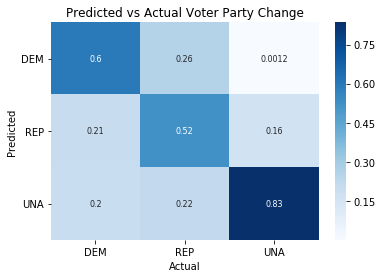

In [7]:
from viz import confusion_matrix_heat_map
%matplotlib inline

confusion_matrix_heat_map(clfnc_tuned, X_test, y_test)

In [12]:
clfnc_tuned.score(X_test, y_test)

0.6882141125960806

## Findings and Conclusions

- Algorithm predicts with close to 70% accuracy
- Unaffiliated predicted with greater than 80% accuracy

Predictive power seems good

## Future Work

Add features to model (how often a voter votes, last time a voter voted, type of election last voted in) and add more data to the model (2018, 2017, etc.)

https://dl.ncsbe.gov/index.html?prefix=ENRS/